# Multiple Linear  Regression from Scratch vs Sklearn Implementation 

### Overview 
In this notebook, I implement **Multiple Linear Regression** from scratch using **NumPy** and compare it with **sklearn's LinearRegression** to validate correctness. The goal is to understand the inner workings of linear regression, including coefficient calculation, prediction, and evaluation metrics.

### Objectives
1. Implement Multiple Linear Regression using the **Normal Equation**.
2. Train the model on the diabetes dataset.
3. Evaluate performance using metrics like **R², MSE, MAE**.
4. Compare results with **sklearn’s LinearRegression** to confirm correctness.
5. Visualize residuals and target distribution for deeper understanding.

In [68]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [69]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 2)

### Dataset information 
- The Diabetes dataset has 442 samples and 10 features(442,10) and it is a classical dataset for testing regression algorithms.
- It has 10 features(age,sex,bmi,blood pressure and 6 blood serum measurements(s1,s2,s3,s4,s5,s6)).
- These 10 features tries to predict the progression of diabetes.

In [70]:
import pandas as pd 

data = load_diabetes()
feature_names = data.feature_names
df = pd.DataFrame(X, columns=feature_names)
df["target"]=y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [71]:
# Shape of the dataset 

print("Shape of dataset:",X.shape, y.shape)

Shape of dataset: (442, 10) (442,)


In [72]:
# Statistical summary of the dataset 

pd.DataFrame(X, columns=feature_names).describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


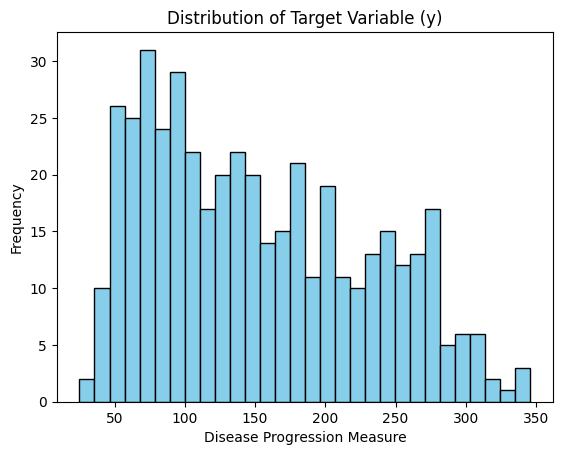

In [73]:
import matplotlib.pyplot as plt 

# Distribution of target variable(y)

plt.hist(y, bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Target Variable (y)")
plt.xlabel("Disease Progression Measure")
plt.ylabel("Frequency")
plt.show()


### Model implementation 

In [74]:
class MultiLinearReg:

    '''A simple implementation of Multiple Linear regression using Normal Equation(OLS method).
    Provides methods to fit the model, make predictions, and evaluate performance with common metrics like mse,r2_score and adjusted r2_score.'''

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None 

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1) # Adding ones in the first column of the input train matrix 

        # calculating the coefficients 
        betas = np.linalg.pinv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        print("Model fitted")
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self,X_test):
        if self.coef_ is None or self.intercept_ is None:
            raise Exception("Model is not fitted yet.")
        X_test = np.insert(X_test,0,1,axis = 1) # Adding ones in the first col of the input test matrix
        betas = np.concatenate(([self.intercept_],self.coef_))
        y_pred = np.dot(X_test,betas)
        return y_pred

    def r2_score(self,X_test,y_test):
        y_pred = self.predict(X_test)
        ss_total = np.sum((y_test - np.mean(y_test))**2)
        ss_res = np.sum((y_test - y_pred)**2)
        return 1-(ss_res/ss_total)
    
    def adjusted_R2(self,X_test,y_test):
        n, k = X_test.shape
        r2 = self.r2_score(X_test,y_test)
        return 1-((1-r2)*(n-1)/(n-k-1))
    
    def mse(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean((y_test-y_pred)**2)
    
    def mae(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(np.abs(y_test-y_pred))
    
    def residuals(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return y_test-y_pred
    

In [75]:
# Training the models 

# My model
my_model = MultiLinearReg()
my_model.fit(X_train, y_train)

# sklearn model 
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)



Model fitted


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Comparision between my model and sklearn model

In [76]:
# Comparision between Intercept and coefficient

print("my_model Intercept: ", my_model.intercept_)
print("sklear Intercept:", sk_model.intercept_)

print("my_model coefficient :",my_model.coef_)
print("sklearn coefficient :",sk_model.coef_)

my_model Intercept:  151.8833100525407
sklear Intercept: 151.88331005254167
my_model coefficient : [  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
sklearn coefficient : [  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]


In [77]:
print("my_model predictions(first 10) :",my_model.predict(X_test[:10]))
print("sklearn predictions(first 10) :",sk_model.predict(X_test[:10]))

my_model predictions(first 10) : [154.1213881  204.81835118 124.93755353 106.08950893 258.5348576
 256.3310074  118.75087616 119.52440696 101.50816735 190.54048661]
sklearn predictions(first 10) : [154.1213881  204.81835118 124.93755353 106.08950893 258.5348576
 256.3310074  118.75087616 119.52440696 101.50816735 190.54048661]


In [78]:
# Comparision between performance metrics 

print("My R²:", my_model.r2_score(X_test, y_test))
print("Sklearn R²:", sk_model.score(X_test, y_test))

print("My MSE:", my_model.mse(X_test, y_test))
print("Sklearn MSE:", mean_squared_error(y_test, sk_model.predict(X_test)))

print("My MAE:", my_model.mae(X_test, y_test))
print("Sklearn MAE:", mean_absolute_error(y_test, sk_model.predict(X_test)))

Our R²: 0.4399338661568968
Sklearn R²: 0.4399338661568968
My MSE: 3094.4566715660626
Sklearn MSE: 3094.4566715660626
My MAE: 45.213034190468996
Sklearn MAE: 45.21303419046903


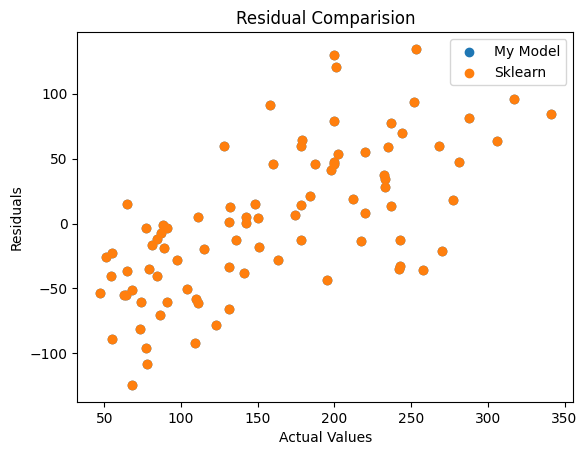

In [79]:
# Residual comparision between my model and sklearn model

plt.scatter(y_test, my_model.residuals(X_test, y_test), label = "My Model")
plt.scatter(y_test, y_test - sk_model.predict(X_test), label="Sklearn")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Comparision")
plt.legend()

# Conclusion

1. The scratch implementation of **Multiple Linear Regression** produces results that are **identical to sklearn's LinearRegression** in terms of:
   - Coefficients and intercept
   - Predictions
   - Evaluation metrics (R², MSE, MAE)
   - Residual plots

2. This demonstrates:
   - Correctness of the mathematical derivation (Normal Equation)
   - Practical understanding of model fitting and evaluation
   - Ability to implement core machine learning algorithms from scratch

3. Insights:
   - The Diabetes dataset shows most patients have moderate disease progression (as seen in the target distribution).
   - Our model successfully captures the relationship between baseline features and disease progression.
   - While our implementation works perfectly for small datasets, **sklearn uses numerically stable solvers** (like SVD) that are more robust for large or ill-conditioned datasets.

Overall, this project bridges theory and practice by showing how linear regression works under the hood and how it compares with a standard library implementation.
